In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def load_and_preprocess_data(data_dir):
    image_files = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image_files.append(image_path)
                labels.append(label)
    return image_files, labels

In [ ]:
data_dir = '/content/drive/MyDrive/skin cancer'
image_files, labels = load_and_preprocess_data(data_dir)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(image_files,
labels_encoded, test_size=0.2, random_state=42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import os
import pathlib
import pandas as pd
import cv2
import PIL
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
data_dir_train = pathlib.Path("/content/drive/MyDrive/skin cancer/Trainisic2017")
data_dir_test = pathlib.Path("/content/drive/MyDrive/skin cancer/Testisic2017")

# Define parameters
batch_size = 32
img_height = 180
img_width = 180
epochs = 20

# Function to remove hair using FFT
def remove_hair_fft(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    # Create a mask to suppress high-frequency hair components
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0  # Suppress high frequencies

    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normalize and convert to 3-channel
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = cv2.cvtColor(img_back.astype(np.uint8), cv2.COLOR_GRAY2RGB)

    return img_back

# Function to apply CLAHE for contrast enhancement
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    lab = cv2.merge([l, a, b])
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return enhanced

# Function to normalize illumination
def normalize_illumination(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_norm = cv2.equalizeHist(img_gray)
    img_norm = cv2.cvtColor(img_norm, cv2.COLOR_GRAY2RGB)
    return img_norm

# Function to apply all preprocessing steps
def preprocess_image(image):
    image = remove_hair_fft(image)  # Using FFT instead of morphological operations
    image = enhance_contrast(image)
    image = normalize_illumination(image)
    image = cv2.resize(image, (img_height, img_width))
    image = image / 255.0  # Normalize to [0,1]
    return image

# Function to preprocess dataset and save images
def preprocess_dataset(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        save_class_path = os.path.join(output_dir, class_folder)

        if not os.path.exists(save_class_path):
            os.makedirs(save_class_path)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            if image is not None:
                image = preprocess_image(image)
                save_path = os.path.join(save_class_path, img_name)
                cv2.imwrite(save_path, (image * 255).astype(np.uint8))  # Convert back to 0-255
                print(f"Preprocessed: {img_name}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preprocess images.
preprocessed_train_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
preprocessed_test_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Test"
preprocess_dataset(str(data_dir_train), preprocessed_train_dir)
preprocess_dataset(str(data_dir_test), preprocessed_test_dir)

Preprocessed: ISIC_0000544.jpg


KeyboardInterrupt: 

In [ ]:
import os

def load_and_resize_image(file_path, target_size=(224, 224)):
    img = Image.open(file_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return img_array

# Get the list of image files within the directory
train_image_files = [os.path.join(preprocessed_train_dir, f) for f in os.listdir(preprocessed_train_dir) if os.path.isfile(os.path.join(preprocessed_train_dir, f))]
test_image_files = [os.path.join(preprocessed_test_dir, f) for f in os.listdir(preprocessed_test_dir) if os.path.isfile(os.path.join(preprocessed_test_dir, f))]

# Now process these image files
X_train_processed = np.array([load_and_resize_image(file) for file in train_image_files])
X_test_processed = np.array([load_and_resize_image(file) for file in test_image_files])

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',

)

Found 2000 files belonging to 3 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="validation",
    validation_split=0.2
)

Found 2000 files belonging to 3 classes.
Using 400 files for validation.


In [ ]:
# Load dataset (example: using image_dataset_from_directory)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/skin cancer/Preprocessed_Train",  # Change this to your actual dataset path
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# Access class names immediately after loading the dataset
class_names = train_ds.class_names
num_classes = len(class_names)

# Now apply performance optimizations
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2000 files belonging to 3 classes.


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="training",
    validation_split=0.2
)

Found 2000 files belonging to 3 classes.
Using 1600 files for training.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_test_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 750 files belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',
                   include_top=False,  # Exclude the fully connected layers
                   input_shape=(180, 180, 3))

# Freeze the layers of VGG16
base_model.trainable = False

# Create the model
model = models.Sequential()

# Add the base VGG16 model
model.add(base_model)

# Rescaling layer
model.add(layers.Rescaling(1./255))

# Flatten layer to convert the 3D outputs from VGG16 into 1D
model.add(layers.Flatten())

# Dense layer
model.add(layers.Dense(128, activation='relu'))

# Dropout layer
model.add(layers.Dropout(0.25))

# Output layer with softmax activation
model.add(layers.Dense(len(class_names), activation='softmax'))

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,353,603 (62.38 MB)

 Trainable params: 1,638,915 (6.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model
optimizer = 'adam'
loss_fn = "categorical_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
# Set epochs and batch size
epochs = 20
batch_size = 32

# Train the model using the training and validation datasets
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 393s 7s/step - accuracy: 0.6589 - loss: 0.8838 - val_accuracy: 0.7000 - val_loss: 0.7601
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 166ms/step - accuracy: 0.6848 - loss: 0.7259 - val_accuracy: 0.6950 - val_loss: 0.7473
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.6972 - loss: 0.6606 - val_accuracy: 0.7025 - val_loss: 0.7561
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.7306 - loss: 0.5768 - val_accuracy: 0.7000 - val_loss: 0.7828
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.7831 - loss: 0.5115 - val_accuracy: 0.7050 - val_loss: 0.7854
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.8287 - loss: 0.4422 - val_accuracy: 0.7075 - val_loss: 0.8267
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.8382 - loss: 0.4070 - val_accuracy: 0.7025 - val_loss: 0.8877
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.8824 - loss: 0.3176 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Loss')

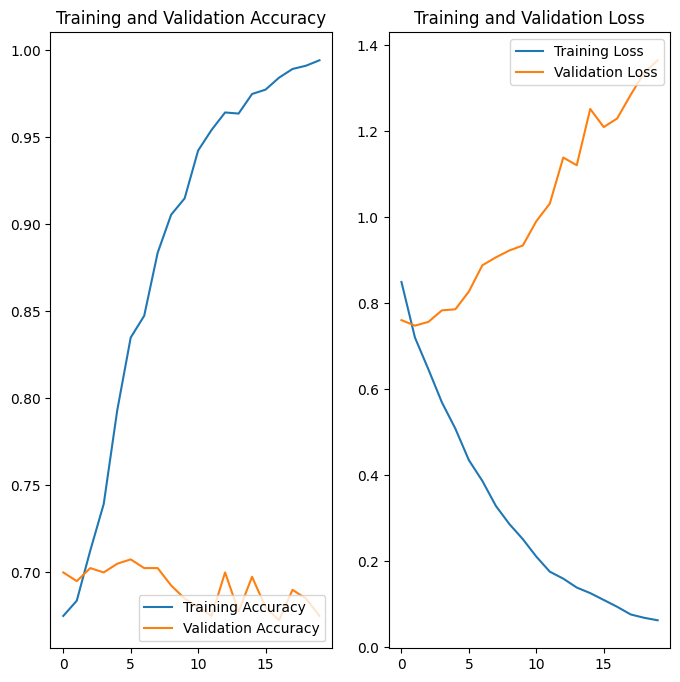

In [ ]:
import matplotlib.pyplot as plt

# Extracting the accuracy and loss for both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs
epochs_range = range(epochs)

# Create a figure with subplots for accuracy and loss
plt.figure(figsize=(8, 8))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9931 - loss: 0.0424
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.7085 - loss: 1.1691
Accuracy:  0.9950000047683716
Validation Accuracy:  0.675000011920929
Loss:  0.0433196984231472
Validation Loss 1.3644740581512451


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

# Define image dimensions and number of classes
img_height = 224
img_width = 224
num_classes = 3  # replace with your actual number of classes

# Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.9),
        layers.RandomZoom(0.9),
    ]
)

# Load Pre-trained VGG16 Model
vgg_base = VGG16(
    weights="imagenet",      # Use pre-trained weights on ImageNet
    include_top=False,       # Exclude the fully connected layer at the top
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model
vgg_base.trainable = False

# Build the Model
model = keras.Sequential([
    data_augmentation,
    vgg_base,
    layers.GlobalAveragePooling2D(),  # Pool the features from VGG16
    layers.Dropout(0.5),              # Add regularization
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the Model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Summary of the Model
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

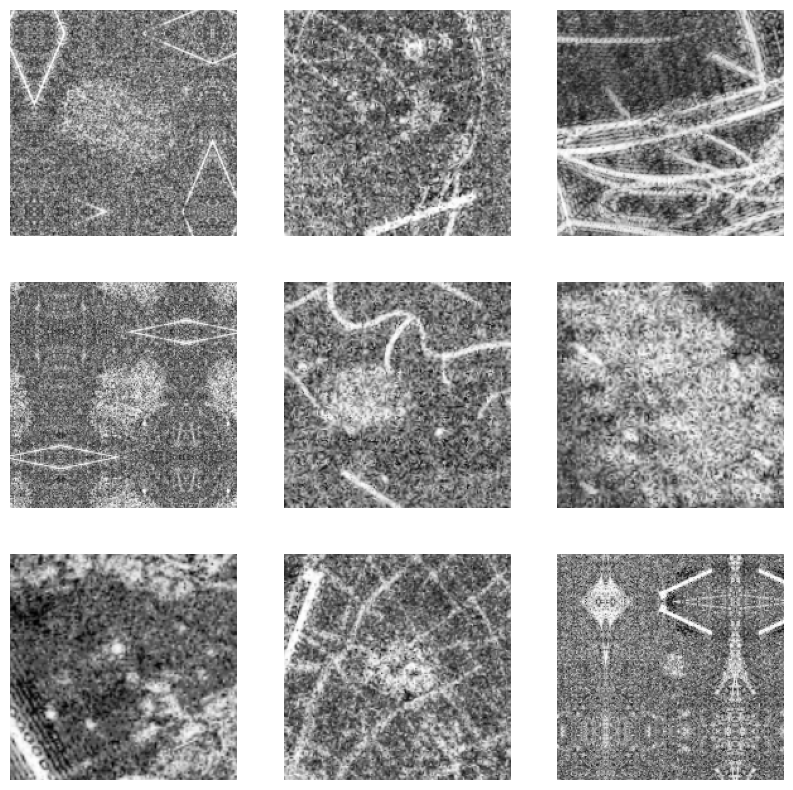

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Make sure data_augmentation and train_ds are defined
# Example: train_ds = tf.keras.utils.image_dataset_from_directory(...)

# Visualize augmented images
plt.figure(figsize=(10, 10))

for images, _ in train_ds.take(1):  # Take one batch from the dataset
    augmented_images = data_augmentation(images)  # Apply augmentation to the whole batch
    for i in range(9):  # Show first 9 images from the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Assuming 'class_names' is already defined
# class_names = ['class1', 'class2', ..., 'classN']

# Load the pre-trained VGG16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the layers of VGG16 so they are not trainable initially
base_model.trainable = False

# Build the model using VGG16 as the base
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Rescaling Layer
    base_model,  # Add the pre-trained VGG16 model
    layers.GlobalAveragePooling2D(),  # Pooling layer after the VGG16 base
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Print the model summary to check the structure
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.6471 - loss: 0.9555 - val_accuracy: 0.7000 - val_loss: 0.8113
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.6852 - loss: 0.8461 - val_accuracy: 0.7000 - val_loss: 0.8024
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.6835 - loss: 0.8320 - val_accuracy: 0.7000 - val_loss: 0.7923
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.6803 - loss: 0.8237 - val_accuracy: 0.7000 - val_loss: 0.7862
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.6916 - loss: 0.8069 - val_accuracy: 0.7000 - val_loss: 0.7824
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.6802 - loss: 0.8130 - val_accuracy: 0.7000 - val_loss: 0.7755
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.6828 - loss: 0.8089 - val_accuracy: 0.7000 - val_loss: 0.7805
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.6735 - loss: 0.8178 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.6871 - loss: 0.7191
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.7481 - loss: 0.6887
Accuracy:  0.6825000047683716
Validation Accuracy:  0.699999988079071
Loss:  0.7291148900985718
Validation Loss 0.7616975903511047


In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor
import os

# Path to your dataset
path_to_training_dataset = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"

# List of class names (subdirectories in the training dataset)
class_names = ['melanoma', 'nevus', 'seborrheic keratosis']
# Augmentation threshold (500 images per class)
target_count = 2500

for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)
    p = Augmentor.Pipeline(class_path, output_directory=os.path.join(output_path, class_name))

    # Get the current number of images in the class folder
    num_current_images = len(os.listdir(class_path))

    # Calculate how many images need to be augmented to reach 500
    num_samples = max(target_count - num_current_images, 0)

    # Apply augmentations
    if num_samples > 0:
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        # Add other augmentation operations as needed (e.g., zoom, flip, etc.)
        p.sample(num_samples)

    print(f"Augmentation for {class_name} complete.")


Initialised with 374 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Resnet_output/melanoma.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7B3211922690>: 100%|██████████| 2126/2126 [00:25<00:00, 84.99 Samples/s]


Augmentation for melanoma complete.
Initialised with 1372 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Resnet_output/nevus.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7B31E65E26D0>: 100%|██████████| 1128/1128 [00:13<00:00, 81.71 Samples/s]


Augmentation for nevus complete.
Initialised with 254 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Resnet_output/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7B3200907B10>: 100%|██████████| 2246/2246 [00:27<00:00, 81.87 Samples/s]

Augmentation for seborrheic keratosis complete.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
import os

augmented_output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"
class_names = ['melanoma', 'nevus','seborrheic keratosis']

for class_name in class_names:
  class_folder_path = os.path.join(augmented_output_path, class_name)
  num_augmented_images = len(os.listdir(class_folder_path))
  print(f"Class: {class_name}, Number of augmented images: {num_augmented_images}")

Class: melanoma, Number of augmented images: 5100
Class: nevus, Number of augmented images: 3628
Class: seborrheic keratosis, Number of augmented images: 4746


In [ ]:
import os
import random

augmented_output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"
class_names = ['melanoma', 'nevus', 'seborrheic keratosis']

# Target number of images per class
target_image_count = 2500

for class_name in class_names:
    class_folder_path = os.path.join(augmented_output_path, class_name)

    # Get the list of all images in the class folder
    all_images = os.listdir(class_folder_path)
    num_augmented_images = len(all_images)

    print(f"Class: {class_name}, Number of augmented images: {num_augmented_images}")

    # Calculate how many images need to be removed
    excess_count = num_augmented_images - target_image_count
    if excess_count > 0:
        # Randomly select images to remove
        to_delete = random.sample(all_images, excess_count)
        for img in to_delete:
            os.remove(os.path.join(class_folder_path, img))
        print(f"Removed {excess_count} images from {class_name}")
    else:
        print(f"No images removed from {class_name}")


Class: melanoma, Number of augmented images: 5100
Removed 2600 images from melanoma
Class: nevus, Number of augmented images: 3628
Removed 1128 images from nevus
Class: seborrheic keratosis, Number of augmented images: 4746
Removed 2246 images from seborrheic keratosis


In [ ]:
import os

augmented_output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"
class_names = ['melanoma', 'nevus','seborrheic keratosis']

for class_name in class_names:
  class_folder_path = os.path.join(augmented_output_path, class_name)
  num_augmented_images = len(os.listdir(class_folder_path))
  print(f"Class: {class_name}, Number of augmented images: {num_augmented_images}")

Class: melanoma, Number of augmented images: 2500
Class: nevus, Number of augmented images: 2500
Class: seborrheic keratosis, Number of augmented images: 2500


/content/drive/MyDrive/skin cancer/Resnet_output/melanoma/melanoma_original_ISIC_0011137.jpg_c7b09d93-bbdd-4841-b940-53fbf3080175.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/nevus/nevus_original_ISIC_0010042.jpg_050d1bb6-75ba-4b6f-bb34-ec8f728a2950.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/seborrheic keratosis/seborrheic keratosis_original_ISIC_0013765.jpg_37be217f-b16b-4808-a9b3-047f2de3ee99.jpg


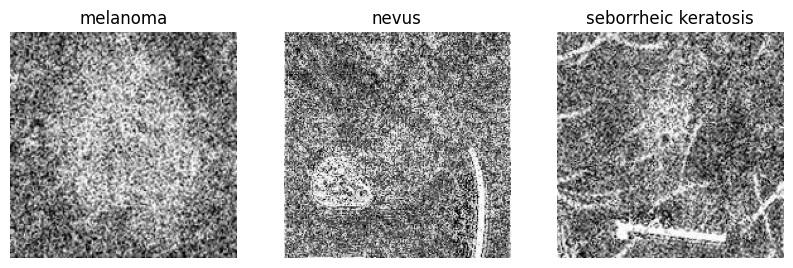

In [4]:
# Visualizing train data after augmentation
import os
import PIL
import matplotlib.pyplot as plt

# Assuming data_dir_train is the path to your training dataset
data_dir_train = "/content/drive/MyDrive/skin cancer/Resnet_output" # Add the actual path to your training data

class_names = [ 'melanoma', 'nevus', 'seborrheic keratosis']

plt.figure(figsize=(10, 10))
for i in range(3):
    files = os.listdir(os.path.join(data_dir_train,class_names[i]))
    image_path = os.path.join(data_dir_train,class_names[i],files[0])
    print(image_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(image_path))
    plt.title(class_names[i])
    plt.axis("off")

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


Found 7500 files belonging to 3 classes.
Using 6000 files for training.


/content/drive/MyDrive/skin cancer/Resnet_output/melanoma/melanoma_original_ISIC_0011137.jpg_c7b09d93-bbdd-4841-b940-53fbf3080175.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/nevus/nevus_original_ISIC_0010042.jpg_050d1bb6-75ba-4b6f-bb34-ec8f728a2950.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/seborrheic keratosis/seborrheic keratosis_original_ISIC_0013765.jpg_37be217f-b16b-4808-a9b3-047f2de3ee99.jpg
Found 7500 files belonging to 3 classes.
Using 1500 files for validation.


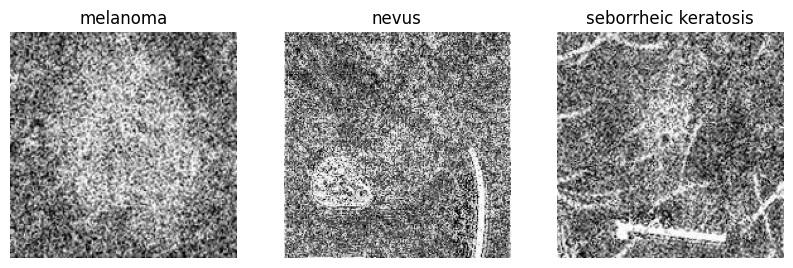

In [6]:
# Visualizing train data after augmentation
import os
import PIL
import matplotlib.pyplot as plt

# Assuming data_dir_train is the path to your training dataset
data_dir_train = "/content/drive/MyDrive/skin cancer/Resnet_output" # Add the actual path to your training data

class_names = [ 'melanoma', 'nevus', 'seborrheic keratosis']

plt.figure(figsize=(10, 10))
for i in range(3):
    files = os.listdir(os.path.join(data_dir_train,class_names[i]))
    image_path = os.path.join(data_dir_train,class_names[i],files[0])
    print(image_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(image_path))
    plt.title(class_names[i])
    plt.axis("off")

# Define data_dir_train before calling tf.keras.preprocessing.image_dataset_from_directory
# data_dir_train should point to your augmented dataset directory
data_dir_train = "/content/drive/MyDrive/skin cancer/Resnet_output"

val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dense, Dropout,
                                     BatchNormalization, GlobalMaxPooling2D, ReLU)
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers.schedules import CosineDecay # Remove CosineDecay import
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Input shape
input_shape = (180, 180, 3)
inputs = Input(shape=input_shape)

# Load VGG16 without top
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze only block5 (last few conv layers)
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Extract base features
x = base_model.output

# Extra conv block
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

# Global pooling
x = GlobalMaxPooling2D()(x)
x = BatchNormalization()(x)

# Simplified Dense Layer
x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(3, activation='softmax')(x)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Instead of CosineDecay, set a fixed initial learning rate
optimizer = Adam(learning_rate=1e-4) # Set initial learning rate directly

# Compile model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

# Model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 128)      │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │             

 Total params: 15,323,075 (58.45 MB)

 Trainable params: 7,687,043 (29.32 MB)

 Non-trainable params: 7,636,032 (29.13 MB)

In [25]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Set epochs to 30
    callbacks=callbacks
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 55s 249ms/step - accuracy: 0.4046 - loss: 1.7201 - val_accuracy: 0.3893 - val_loss: 1.7257 - learning_rate: 1.0000e-04
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 73s 221ms/step - accuracy: 0.4894 - loss: 1.4247 - val_accuracy: 0.3773 - val_loss: 1.9812 - learning_rate: 1.0000e-04
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 222ms/step - accuracy: 0.5515 - loss: 1.2534 - val_accuracy: 0.4393 - val_loss: 1.7881 - learning_rate: 1.0000e-04
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.5885 - loss: 1.1378 - val_accuracy: 0.6460 - val_loss: 1.0027 - learning_rate: 1.0000e-04
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 222ms/step - accuracy: 0.6689 - loss: 0.9682 - val_accuracy: 0.7613 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 78s 202ms/step - accuracy: 0.7349 - loss: 0.7901 - val_accuracy: 0.5700 - val_loss: 1.6279 - learning_rate: 1.0000e-04
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 22

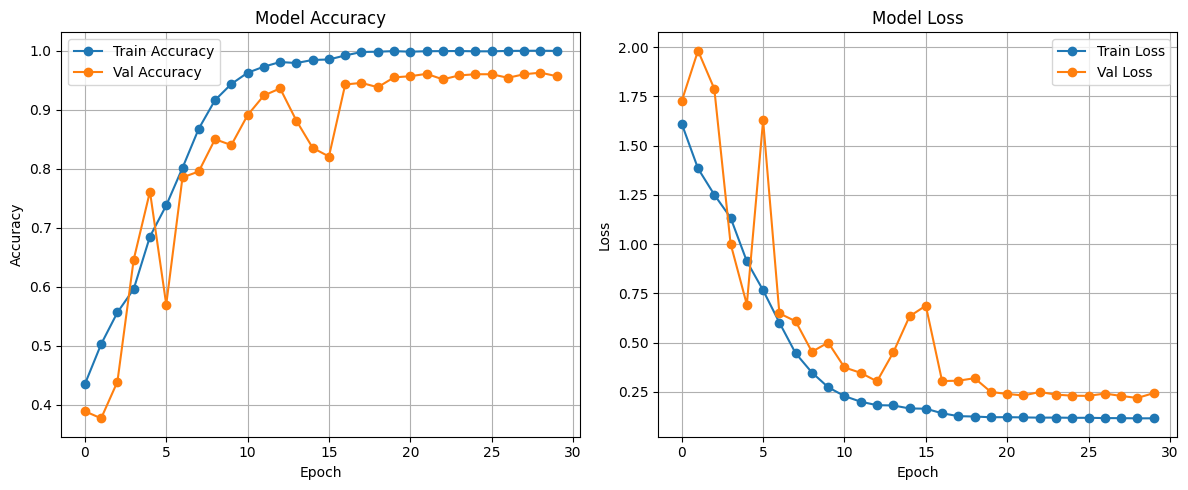

In [26]:
import matplotlib.pyplot as plt



# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.9976 - loss: 0.1281
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.9655 - loss: 0.2186
Accuracy:  0.9988333582878113
Validation Accuracy:  0.9626666903495789
Loss:  0.11978945881128311
Validation Loss 0.2195161134004593


/content/drive/MyDrive/skin cancer/Resnet_output/melanoma/melanoma_original_ISIC_0011137.jpg_c7b09d93-bbdd-4841-b940-53fbf3080175.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/nevus/nevus_original_ISIC_0010042.jpg_050d1bb6-75ba-4b6f-bb34-ec8f728a2950.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/seborrheic keratosis/seborrheic keratosis_original_ISIC_0013765.jpg_37be217f-b16b-4808-a9b3-047f2de3ee99.jpg
Found 7500 files belonging to 3 classes.
Using 6000 files for training.


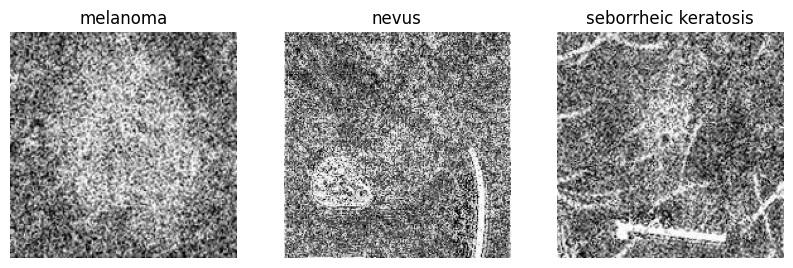

In [28]:
# Visualizing train data after augmentation
import os
import PIL
import matplotlib.pyplot as plt

# Assuming data_dir_train is the path to your training dataset
data_dir_train = "/content/drive/MyDrive/skin cancer/Resnet_output" # Add the actual path to your training data

class_names = [ 'melanoma', 'nevus', 'seborrheic keratosis']

plt.figure(figsize=(10, 10))
for i in range(3):
    files = os.listdir(os.path.join(data_dir_train,class_names[i]))
    image_path = os.path.join(data_dir_train,class_names[i],files[0])
    print(image_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(image_path))
    plt.title(class_names[i])
    plt.axis("off")

# Define data_dir_train before calling tf.keras.preprocessing.image_dataset_from_directory
# data_dir_train should point to your augmented dataset directory
#data_dir_train = "/content/drive/MyDrive/skin cancer/Resnet_output"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

In [10]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 7500 files belonging to 3 classes.
Using 1500 files for validation.


In [29]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

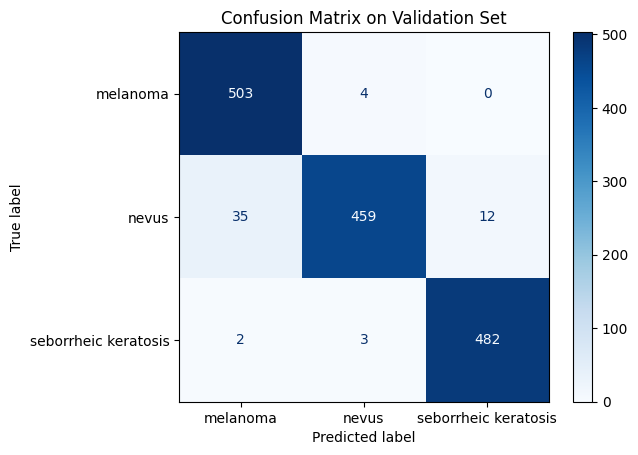

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Validation Set")
plt.show()


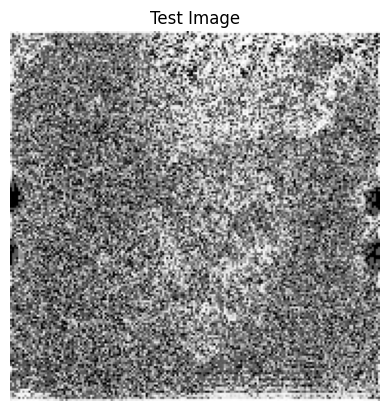

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Actual Class: seborrheic keratosis
Predicted Class: seborrheic keratosis


In [31]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os
import matplotlib.pyplot as plt

# Define test directory and class names
data_dir_test = '/content/drive/MyDrive/skin cancer/Preprocessed_Test'
class_names = ['melanoma', 'nevus', 'seborrheic keratosis']

# Pick an image from a class for testing
Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
Test_image_list = glob(Test_image_path)
Test_image = load_img(Test_image_list[-1], target_size=(180, 180))  # Your VGG16 model input is (180, 180, 3)

# Show the image
plt.imshow(Test_image)
plt.title("Test Image")
plt.axis('off')
plt.show()

# Preprocess the image for VGG16
img_array = img_to_array(Test_image)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Important for VGG16

# Make prediction
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred)
predicted_class = class_names[predicted_class_index]

# Print results
print("Actual Class: " + class_names[2])
print("Predicted Class: " + predicted_class)
